# MODEL TRAINING

#### Import Data and Required Packages 

### Install packages

In [2]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#Data Trandormation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Modelling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv('/Users/meghawadhwa/Downloads/stud-2.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Independant & dependant features

In [9]:
X= df.drop(["math_score"], axis =1)

In [10]:
Y = df["math_score"]

### Identifying numerical and categorical features

In [12]:
num_fea = X.select_dtypes(exclude="object").columns
cat_fea= X.select_dtypes(include="object").columns

In [13]:
for i in df.columns:
    if i in cat_fea:
        print("Categories in {} are {} : ".format(i, df[i].nunique()), end = "  ")
        print(df[i].unique())

Categories in gender are 2 :   ['female' 'male']
Categories in race_ethnicity are 5 :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education are 6 :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch are 2 :   ['standard' 'free/reduced']
Categories in test_preparation_course are 2 :   ['none' 'completed']


### Preprocessing for numerical and categorical features

In [15]:
numerical_transformation= StandardScaler()
oh_transformation = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[("OneHotEncoder",oh_transformation,cat_fea),
               ("StandardScaler",numerical_transformation, num_fea)]
)

In [16]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [17]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(1000, 19)

### Splitting data into train test 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [22]:
def evaluate_model(true, predict):
    mae=mean_absolute_error(true, predict)
    mse=mean_squared_error(true,predict)
    rmse = np.sqrt(mean_squared_error(true, predict))
    r2_square = r2_score(true, predict)
    return mae, rmse, r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store results
model_list= []
r2_list= []

# Iterate over models
for model_name, model in models.items():
    model.fit(X_train, y_train) # Train model

    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)



In [31]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3257
- Mean Absolute Error: 4.2698
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4212
- Mean Absolute Error: 4.2345
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7079
- Mean Absolute Error: 4.5168
- R2 Score: 0.8555
-----------------------

### Select best fitting model

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model_Name", "R2_score"]).sort_values(by= ["R2_score"],ascending = False)

,Model_Name,R2_score
2,Ridge,0.880593
0,Linear Regression,0.879222
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849433
8,AdaBoost Regressor,0.844025
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.738800


## Linear Regression

In [36]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.92


### Plot y_pred and y_test

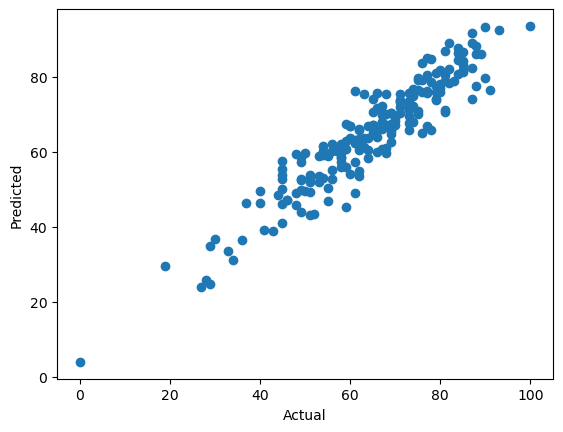

In [41]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

### Residuals -Difference between Actual and Predicted Values

In [38]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.542969,14.457031
737,53,58.859375,-5.859375
740,80,76.929688,3.070312
660,74,76.554688,-2.554688
411,84,87.511719,-3.511719
...,...,...,...
408,52,43.464844,8.535156
332,62,62.035156,-0.035156
208,74,67.859375,6.140625
613,65,67.167969,-2.167969


## Ridge Regression

In [55]:
Ridge_model = Ridge(fit_intercept=True)
Ridge_model = lin_model.fit(X_train, y_train)
y_pred = Ridge_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.06


In [42]:
#Residuals
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


In [53]:
print(lin_model.coef_)

[-6.49739745  6.49739745 -0.79442253 -0.44563794 -1.42302404 -1.38710521
  4.05018972 -0.09474545 -0.78471212  0.8073354  -1.45580342  0.89684445
  0.63108115 -1.76513861  1.76513861 -1.61630603  1.61630603  3.59967894
 10.80955319]


In [54]:
print(lin_model.intercept_)

65.5316748454873


In [58]:
residuals=pred_df["Difference"]
residuals

521    14.601295
737    -5.842469
740     3.007871
660    -2.805898
411    -3.615387
         ...    
408     8.507707
332    -0.170763
208     6.089675
613    -2.061504
78     -1.427189
Name: Difference, Length: 200, dtype: float64

/Users/meghawadhwa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


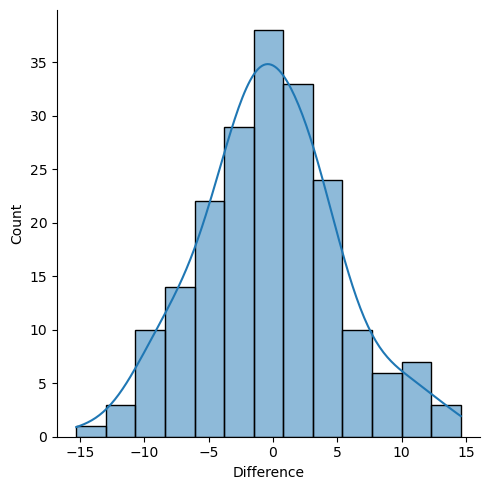

In [59]:
sns.displot(residuals, kde = True)

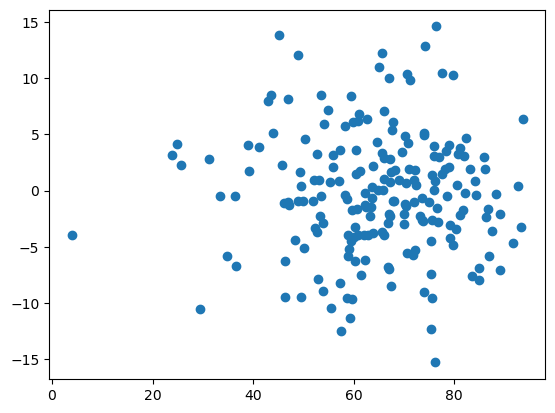

In [60]:
plt.scatter(y_pred, residuals)